In [1]:
import fsspec
import xarray as xr
import zarr
import numpy as np
import holoviews as hv
import pandas as pd
import panel as pn
import param

%opts magic unavailable (pyparsing cannot be imported)
%compositor magic unavailable (pyparsing cannot be imported)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
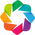

In [2]:
hv.extension('bokeh')
pn.extension(nthreads=4)

In [3]:
# Download data
END_POINT_URL = "https://s3.echo.stfc.ac.uk"

url = f"s3://mast/test/level2/shots/30462.zarr"
fs = fsspec.filesystem(
    **dict(
        protocol="simplecache",
        target_protocol="s3",
        target_options=dict(anon=True, endpoint_url=END_POINT_URL)
    )
)

store = zarr.storage.FSStore(fs=fs, url=url)

dalpha_dataset = xr.open_zarr(store, group="dalpha")

In [4]:
# Visualize D-Alpha curve
dalpha_signal = dalpha_dataset.dalpha_mid_plane_wide.copy()
hv.Curve(dalpha_signal)

:Curve   [time]   (dalpha_mid_plane_wide)

In [5]:
# Set some basic parameters for this notebook
MOVING_AV_LENGTH = 0.001
THRESHOLD = 0.15
MIN_ELM_DURATION = 0.05 * 1e-3
MAX_ELM_DURATION = 50 * 1e-3
MIN_ELM_SEPERATION = 1.5 * 1e-3
T_MIN = 0.12
T_MAX = 0.2
ELM_INTERVAL = 0.005

In [6]:
# ELM analysis functions
def background_subtract(signal):
    dtime = signal.time.values
    values = signal.values
    dt = dtime[1]-dtime[0]
    n = int(MOVING_AV_LENGTH/dt)
    ret = np.cumsum(values, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    ret = ret[n - 1:] / n
    values[n - 1:]-=ret
    signal.values = values
    return signal

def identify_bursts(series, analyse=False):
    inds_above_threshold = np.where(series>THRESHOLD)
    inds_below_threshold = np.where(series<=THRESHOLD)
    windows = []
    for _, ind in enumerate(inds_above_threshold[0]):
        try:
            #Extract highest possible index that occurs before a filement,
            ind_low = np.extract(inds_below_threshold < ind,inds_below_threshold)[-1]
            #Extract lowest possible index that occurs after a filemant
            ind_up = np.extract(inds_below_threshold > ind,inds_below_threshold)[0]
            if (ind_low,ind_up) not in windows:
                #Make sure that there is no double counting
                windows.append((ind_low,ind_up))
        except:
            pass
    if analyse:
            N_bursts = len(windows)
            burst_ratio = len(list(series))/N_bursts
            av_window = np.mean([y - x for x,y in windows])
            return windows,N_bursts,burst_ratio,av_window
    else:
        return windows

def calculate_elm_frequency(elm_times):
    freq_t = np.arange(min(elm_times),max(elm_times), ELM_INTERVAL)
    freq = np.zeros(len(freq_t))

    for index, time in enumerate(freq_t):
        num = len(np.where((elm_times>time-ELM_INTERVAL/2)&(elm_times<time+ELM_INTERVAL/2))[0])
        freq[index] = num/ELM_INTERVAL

    return freq_t, freq

def analyze_bursts(series, windows):
    too_short_windows = []
    too_long_windows = []

    num_too_short=0
    num_too_long=0

    dtime = series.time.values
    dalpha = series.values

    # filter spikes too short to be elms
    for i in range(len(windows)):
        if (dtime[windows[i][1]]-dtime[windows[i][0]])<MIN_ELM_DURATION:
            too_short_windows.append(windows[i])
            windows[i]=(0,0)
            num_too_short+=1
        if (dtime[windows[i][1]]-dtime[windows[i][0]])>MAX_ELM_DURATION:
            too_long_windows.append(windows[i])
            windows[i]=(0,0)
            num_too_long+=1

    windows = [x for x in windows if x!=(0,0)]

    too_short_inds = [np.argmax(dalpha[too_short_windows[x][0]:too_short_windows[x][1]]) + too_short_windows[x][0] for x in range(len(too_short_windows))]
    too_long_inds = [np.argmax(dalpha[too_long_windows[x][0]:too_long_windows[x][1]]) + too_long_windows[x][0] for x in range(len(too_long_windows))]

    too_short = dalpha[too_short_inds]
    too_short_t = dtime[too_short_inds]

    too_long = dalpha[too_long_inds]
    too_long_t = dtime[too_long_inds]

    elm_inds = [np.argmax(dalpha[windows[x][0]:windows[x][1]]) + windows[x][0] for x in range(len(windows))]
    elm_heights = dalpha[elm_inds]
    elm_times = dtime[elm_inds]


    freq_filtered_inds = np.zeros(0,dtype=int)

    for i in range(len(elm_inds)-1):
        if elm_heights[i]!=0 and i not in freq_filtered_inds:
            close_inds = np.where(elm_times[i+1:]-elm_times[i]<MIN_ELM_SEPERATION)[0]+i+1
            freq_filtered_inds=np.concatenate((freq_filtered_inds,close_inds))

    freq_filtered_inds = np.unique(freq_filtered_inds)
    freq_filtered_t = elm_times[freq_filtered_inds]
    freq_filtered = elm_heights[freq_filtered_inds]

    elm_times[freq_filtered_inds]=0
    elm_heights[freq_filtered_inds]=0

    elm_times=elm_times[np.where(elm_heights!=0)]
    elm_heights=elm_heights[np.where(elm_heights!=0)]

    elm_frequency_times, elm_frequency = calculate_elm_frequency(elm_times)

    return elm_times, elm_heights, elm_frequency_times, elm_frequency

In [7]:
# Clean up D-Alpha signal
dalpha_signal = dalpha_signal.dropna(dim='time')
dalpha_signal = background_subtract(dalpha_signal)
dalpha_signal = dalpha_signal.sel(time=slice(T_MIN, T_MAX))
clean_dalpha_trace = hv.Curve(dalpha_signal).redim(x='time').redim(y='dalpha').opts(width=800)
clean_dalpha_trace

:Curve   [time]   (dalpha_mid_plane_wide)

In [8]:
# Generate ELM data
windows = identify_bursts(dalpha_signal)
elm_t, elm_height, elm_frequency_t, elm_frequency = analyze_bursts(dalpha_signal, windows)
valid_elm_scatter = hv.Scatter((elm_t, elm_height)).opts(color="red", marker="x", size=8, selection_alpha=1, nonselection_alpha=1).redim(x='time').redim(y='dalpha')
elm_frequency_curve = hv.Curve((elm_frequency_t, elm_frequency)).redim(x='time')
elm_frequency_scatter = hv.Scatter((elm_frequency_t, elm_frequency)).redim(x='time')

In [9]:
elm_location_plot = clean_dalpha_trace * valid_elm_scatter
elm_location_plot

:Overlay
   .Curve.I   :Curve   [time]   (dalpha_mid_plane_wide)
   .Scatter.I :Scatter   [time]   (dalpha)

In [10]:
elm_frequency_plot = elm_frequency_curve * elm_frequency_scatter.opts(color="red", marker="x", size=8, selection_alpha=1, nonselection_alpha=1, width=800)
elm_frequency_plot

:Overlay
   .Curve.I   :Curve   [time]   (y)
   .Scatter.I :Scatter   [time]   (y)

In [11]:
# Set up zone tracking structures
class ZoneStream(hv.streams.Stream):
    zones = hv.param.Dict(default={})

zone_stream = ZoneStream()
zone_widgets = pn.Column()

In [12]:
import time
# Callback for adding a zone
def bounding_box_cb(boundsx):
     # Work out what ID the new zone should be assigned to - must be higher than highest existing ID
    current_zones = zone_stream.contents["zones"].copy()
    zone_keys = list(current_zones.keys())
    if len(zone_keys) > 0:
        zone_id = zone_keys[-1] + 1
    else:
        zone_id = 0

    # Assign the new zone through event triggering to ensure callbacks are triggered
    current_zones[zone_id] = ([boundsx[0], boundsx[1], "Type I"])
    zone_stream.event(zones=current_zones)

    # Zone type allocation - zone types should be enumerated in the future
    zone_selector = pn.widgets.Select(
        options=['Type I', 'Type II', 'Type III']
    )

    def update_zone_type(event, zone_id=zone_id):
        zone_copy = zone_stream.contents["zones"].copy()
        zone_copy[zone_id][2] = event.new
        zone_stream.event(zones=zone_copy)

    zone_selector.param.watch(update_zone_type, 'value')

    # Zone removal
    def remove_zone(event, zone_id=zone_id):
        zone_copy = zone_stream.contents["zones"].copy()
        # To easily remove the correct widget find the order of the keys and pop correct one
        zone_list = list(zone_copy.keys())
        removal_id = zone_list.index(zone_id)
        zone_widgets.pop(removal_id)
        time.sleep(0.1)
        zone_copy.pop(zone_id)
        zone_stream.event(zones=zone_copy) # Trigger event to ensure updates happen

    remove_button = pn.widgets.Button(name="Remove")
    remove_button.on_click(remove_zone)

    # Create individual zone controls to be added with new zone
    zone_controls = pn.Row(zone_selector, remove_button)
    zone_widgets.append(zone_controls) # Add new control to current list of widgets

In [13]:
# Attach the bounding box callback to the BoundsX stream
# This stream is attached to the D-Alpha curve and will generate an event when the bound tool is used
hv.streams.BoundsX(source=clean_dalpha_trace, boundsx=(0, 0)).add_subscriber(bounding_box_cb)
hv.streams.BoundsX(source=elm_frequency_curve, boundsx=(0, 0)).add_subscriber(bounding_box_cb)

In [14]:
# Function to convert zone type into a colour
def get_zone_color(zone_type):
    if zone_type == "Type I":
        return "DarkCyan"
    elif zone_type == "Type II":
        return "Gold"
    else:
        return "IndianRed"

In [15]:
# Set up the dynamic map that creates the zones - this occurs every time the zones update
def generate_zones(zones):
    if not zones:
        return hv.NdOverlay({0: hv.VSpan(0, 0).opts(alpha=0, line_alpha=0)})  # Ensure it always returns an NdOverlay
        
    spans = {i: hv.VSpan(x0, x1).opts(color=get_zone_color(zone_type)) for i, (x0, x1, zone_type) in zones.items()}
    return hv.NdOverlay(spans)

elm_zones_dmap = hv.DynamicMap(generate_zones, streams=[zone_stream])
freq_zones_dmap = hv.DynamicMap(generate_zones, streams=[zone_stream])

In [16]:
# Create a layout that contains the D-Alpha curve with the ELMs and zones overlayed
# and the zone tools next to it
elm_overlay = valid_elm_scatter * clean_dalpha_trace.opts(tools=['xbox_select']) * elm_zones_dmap
frequency_overlay = elm_frequency_scatter * elm_frequency_curve.opts(tools=['xbox_select']) * freq_zones_dmap

graphs_layout = (elm_overlay + frequency_overlay).cols(1)

layout = pn.Row(
    graphs_layout,
    zone_widgets
)
layout

Row
    [0] HoloViews(Layout)
    [1] Column()

In [17]:
selected_indexes = []

def print_selection(index):
    global selected_indexes
    selected_indexes = index

lasso_elm_scatter = hv.Scatter((elm_t, elm_height)).opts(color="red", marker="x", size=8).redim(x='time').redim(y='dalpha')
selection = hv.streams.Selection1D(source=lasso_elm_scatter).add_subscriber(print_selection)


In [18]:
lasso_zones_dmap = hv.DynamicMap(generate_zones, streams=[zone_stream])
lasso_overlay = lasso_elm_scatter.opts(tools=["lasso_select"]) * clean_dalpha_trace * lasso_zones_dmap

In [19]:
def create_lasso_zone(event):
    if len(selected_indexes) == 0:
        return
    lower_bound = elm_t[selected_indexes[0]]
    upper_bound = elm_t[selected_indexes[-1]]
    bounding_box_cb((lower_bound, upper_bound))    

create_lasso_zone_button = pn.widgets.Button(name="Create zone from selection")
create_lasso_zone_button.on_click(create_lasso_zone)

Watcher(inst=Button(name='Create zone f...), cls=<class 'panel.widgets.button.Button'>, fn=<function create_lasso_zone at 0x00000233D1EB04A0>, mode='args', onlychanged=False, parameter_names=('clicks',), what='value', queued=False, precedence=0)

In [20]:
lasso_layout = pn.Row(
    lasso_overlay,
    create_lasso_zone_button
)
lasso_layout

Row
    [0] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=800)
    [1] Button(name='Create zone f...)